<a href="https://colab.research.google.com/github/piyush1856/gen-ai/blob/main/_11ImageToTextTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# image generation through GANs

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from huggingface_hub import from_pretrained_keras


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/213k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/5.35M [00:00<?, ?B/s]

model.png:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

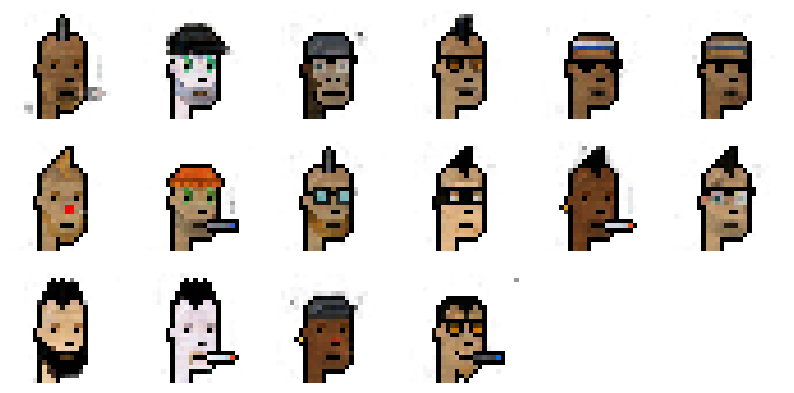

In [ ]:
seed = 47
n_images = 16 #no. of images to be generated
codings_size = 100 #size of the noise vector
generator = from_pretrained_keras("huggan/crypto-gan")

def generate(generator, seed):
    noise = tf.random.normal(shape=[n_images, codings_size], seed=seed)
    generated_images = generator(noise, training=False)

    fig = plt.figure(figsize=(10, 10))
    for i in range(generated_images.shape[0]):
        plt.subplot(6, 6, i+1)
        plt.imshow(generated_images[i, :, :, :])
        plt.axis('off')
    plt.savefig("samples.png")

generate(generator, seed)

In [ ]:

!gdown 1Ziy6K5eaScAD6Z0GN8KtaSVnvKwgqBTQ

Downloading...
From: https://drive.google.com/uc?id=1Ziy6K5eaScAD6Z0GN8KtaSVnvKwgqBTQ
To: /content/cat1.jpeg
100% 223k/223k [00:00<00:00, 106MB/s]


In [ ]:
#question answering on the images - Visual Question Answer/ Visual Resoning


from PIL import Image
from transformers import pipeline

pipe = pipeline("visual-question-answering", model="Salesforce/blip-vqa-capfilt-large")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

In [ ]:
img= Image.open('cat1.jpeg')

que= "Is there an elephant?"
pipe (img, que)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'answer': 'no'}]

In [ ]:
que= "Is there a cat?"
pipe (img, que)

[{'answer': 'yes'}]

In [ ]:
que= "What's the color of the cat?"
pipe (img, que)

[{'answer': 'brown'}]

In [ ]:
!gdown 15kmBQglvnMh8VevC9tiyMzTXuS8FnK-N

Downloading...
From: https://drive.google.com/uc?id=15kmBQglvnMh8VevC9tiyMzTXuS8FnK-N
To: /content/purchase.jpg
100% 271k/271k [00:00<00:00, 72.2MB/s]


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa")

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

In [ ]:
img= Image.open('purchase.jpg')

que= "What's the total in USD?"
pipe (image=img, question=que)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'answer': '$1,680.00'}]

In [ ]:
img= Image.open('purchase.jpg')

que= "What's the total in Rupees?"
pipe (image=img, question=que)

[{'answer': '$1,680.00'}]